In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("C:/dataset/IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
X=df.drop(['species'],axis=1)
y=df['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled,  y_train)
y_pred = model.predict(x_test_scaled)

print("Accuracy_score : ",accuracy_score(y_test,y_pred))
print("Confusion matrix : \n",confusion_matrix(y_test,y_pred))
print("Classification Report :\n",classification_report(y_test,y_pred))

Accuracy_score :  0.9666666666666667
Confusion matrix : 
 [[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



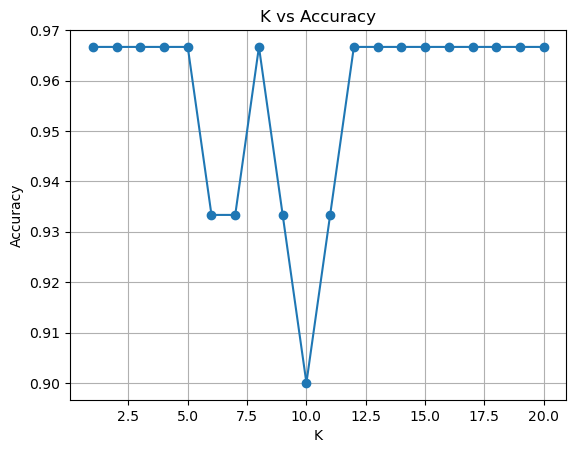

Best K: 1, Accuracy: 0.97


In [10]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, y_train)
    y_kpred = model.predict(x_test_scaled)
    accuracies.append(accuracy_score(y_test, y_kpred))

plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best K: {best_k}, Accuracy: {max(accuracies):.2f}")


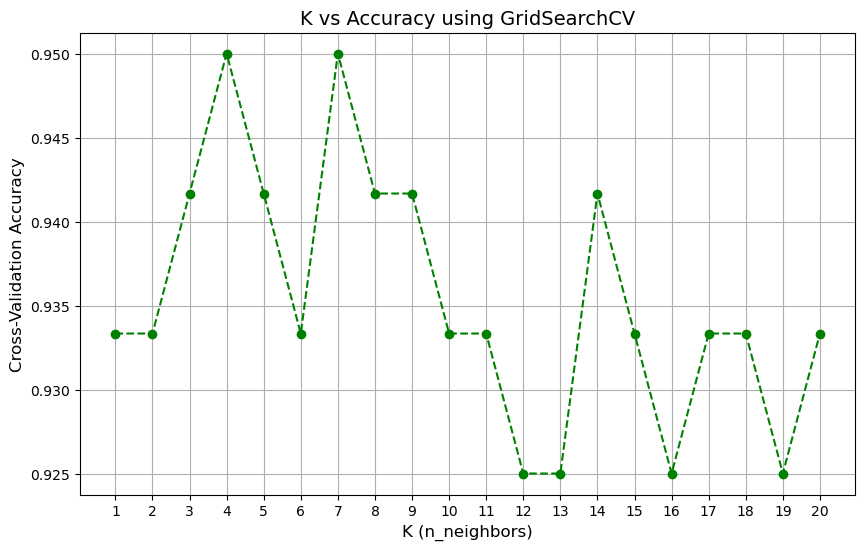

✅ Best K: 4
🎯 Best Accuracy: 0.95


In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid (K values to test)
param_grid = {'n_neighbors': list(range(1, 21))}

# Step 2: Initialize KNN model
knn = KNeighborsClassifier()

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Step 4: Fit GridSearchCV on training data
grid_search.fit(x_train_scaled, y_train)

# Step 5: Extract results
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors']

# Step 6: Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='--', color='green')
plt.title("K vs Accuracy using GridSearchCV", fontsize=14)
plt.xlabel("K (n_neighbors)", fontsize=12)
plt.ylabel("Cross-Validation Accuracy", fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Step 7: Best K and Accuracy
print("✅ Best K:", grid_search.best_params_['n_neighbors'])
print("🎯 Best Accuracy:", round(grid_search.best_score_, 4))
